# Tall precursor

In [1]:
# Load the modules
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend/'  # where amrwind-frontend resides
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import amrwind_frontend as amrwind
import matplotlib.pyplot    as plt

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the case
case = amrwind.MyApp.init_nogui()

In [3]:
# Set the time constants
case.setAMRWindInput('time.stop_time', 20000.0)
case.setAMRWindInput('time.max_step',  80000)

case.setAMRWindInput('time.fixed_dt',  0.25)
case.setAMRWindInput('time.checkpoint_interval',  2000)
case.setAMRWindInput('time.plot_interval', 2000)

In [4]:
# Set some basic parameters
case.setAMRWindInput('incflo.physics',      ['ABL'])
case.setAMRWindInput('incflo.verbose',      3)
case.setAMRWindInput('io.check_file',       'chk')

case.setAMRWindInput('incflo.use_godunov',  True)
case.setAMRWindInput('incflo.godunov_type', 'weno')

case.setAMRWindInput('turbulence.model',    ['OneEqKsgsM84'])
case.setAMRWindInput('TKE.source_terms',    ['KsgsM84Src'])

case.setAMRWindInput('transport.viscosity', 1.5e-05)

In [5]:
# Set some tolerances
tols = """
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol                       = 1e-12               
mac_proj.mg_rtol                         = 1e-06               
mac_proj.mg_atol                         = 1e-12               
diffusion.mg_rtol                        = 1e-06               
diffusion.mg_atol                        = 1e-12               
temperature_diffusion.mg_rtol            = 1e-10               
temperature_diffusion.mg_atol            = 1e-13               
"""
case.loadAMRWindInput(tols, string=True);

In [6]:
case.setAMRWindInput('geometry.prob_lo', [   0.0,    0.0, 0.0 ])
case.setAMRWindInput('geometry.prob_hi', [5120.0, 5120.0, 15360.0])
case.setAMRWindInput('amr.n_cell',       [64,     64,     192])
case.setAMRWindInput('amr.max_level',    3)

In [7]:
case.setAMRWindInput('is_periodicx', True)
case.setAMRWindInput('is_periodicy', True)
case.setAMRWindInput('is_periodicz', False)

case.setAMRWindInput('zlo.type',              'wall_model')          
case.setAMRWindInput('zlo.temperature_type',  'wall_model')          
case.setAMRWindInput('zlo.tke_type',          'zero_gradient')       
case.setAMRWindInput('zhi.type',              'slip_wall')           
case.setAMRWindInput('zhi.temperature_type',  'fixed_gradient')      
case.setAMRWindInput('zhi.temperature',       0.003) 

In [8]:
case.setAMRWindInput('ICNS.source_terms',     ['ABLForcing','BoussinesqBuoyancy', 'CoriolisForcing'])

case.setAMRWindInput('ABL.stats_output_frequency',   1)                   
case.setAMRWindInput('ABL.stats_output_format',      'netcdf')

case.setAMRWindInput('incflo.velocity',     [6.3639610306789285, 6.3639610306789285, 0.0])
case.setAMRWindInput('ABLForcing.abl_forcing_height',   150)
case.setAMRWindInput('ABL.kappa',                       0.4) 

case.setAMRWindInput('ABL.normal_direction',      2)
case.setAMRWindInput('ABL.surface_roughness_z0',  0.0001)
case.setAMRWindInput('ABL.reference_temperature', 300.0)
case.setAMRWindInput('ABL.surface_temp_rate',     0.0)
case.setAMRWindInput('ABL.surface_temp_flux',     0.0)

case.setAMRWindInput('ABL.mo_beta_m',             16.0)
case.setAMRWindInput('ABL.mo_gamma_m',            5.0)
case.setAMRWindInput('ABL.mo_gamma_h',            5.0)
case.setAMRWindInput('ABL.random_gauss_mean',     0.0)
case.setAMRWindInput('ABL.random_gauss_var',      1.0)

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


In [9]:
case.setAMRWindInput('CoriolisForcing.latitude',  41.5)
case.setAMRWindInput('BoussinesqBuoyancy.reference_temperature', 300) 

case.setAMRWindInput('ABL.temperature_heights', '0     6000.0 6100.0 15360.0')
case.setAMRWindInput('ABL.temperature_values',  '300.0 300.0  301.0 328.78')

In [10]:
# This is a case where we don't want to use the defaults in amrwind-frontend
case.setAMRWindInput('ABL.perturb_ref_height', 50.0)
case.setAMRWindInput('ABL.Uperiods', 4.0)
case.setAMRWindInput('ABL.Vperiods', 4.0)
case.setAMRWindInput('ABL.deltaU',   1.0)
case.setAMRWindInput('ABL.deltaV',   1.0)
case.setAMRWindInput('ABL.theta_amplitude',   None)
case.setAMRWindInput('ABL.cutoff_height',   None)

In [11]:
case.setAMRWindInput('time.plot_interval',        2000)

case.setAMRWindInput('incflo.post_processing',    ['sampling'])            
case.setAMRWindInput('sampling.output_frequency', 1000)                 
case.setAMRWindInput('sampling.fields',           ['velocity', 'temperature'])

In [12]:
### ADD REFINEMENT WINDOWS

## -- level 0 --
# Get the default dictionary for refinement window
refinewin = case.get_default_taggingdict()
# Edit the parameters of the refinement window
refinewin['tagging_name']         = 'box1'
refinewin['tagging_shapes']       = 'box1'
refinewin['tagging_type']         = 'GeometryRefinement'
refinewin['tagging_level']        = 0
refinewin['tagging_geom_type']    = 'box'
refinewin['tagging_geom_origin']  = [0, 0, 0]
refinewin['tagging_geom_xaxis']   = [5120, 0, 0]
refinewin['tagging_geom_yaxis']   = [0, 5120, 0]
refinewin['tagging_geom_zaxis']   = [0, 0, 7680]
# Add refinement zone to simulation.
case.add_tagging(refinewin)

## -- level 2 --
# Get the default dictionary for refinement window
refinewin = case.get_default_taggingdict()
# Edit the parameters of the refinement window
refinewin['tagging_name']         = 'box2'
refinewin['tagging_shapes']       = 'box2'
refinewin['tagging_type']         = 'GeometryRefinement'
refinewin['tagging_level']        = 1
refinewin['tagging_geom_type']    = 'box'
refinewin['tagging_geom_origin']  = [0, 0, 0]
refinewin['tagging_geom_xaxis']   = [5120, 0, 0]
refinewin['tagging_geom_yaxis']   = [0, 5120, 0]
refinewin['tagging_geom_zaxis']   = [0, 0, 5120]
# Add refinement zone to simulation.
case.add_tagging(refinewin)

## -- level 3 --
# Get the default dictionary for refinement window
refinewin = case.get_default_taggingdict()
# Edit the parameters of the refinement window
refinewin['tagging_name']         = 'box3'
refinewin['tagging_shapes']       = 'box3'
refinewin['tagging_type']         = 'GeometryRefinement'
refinewin['tagging_level']        = 2
refinewin['tagging_geom_type']    = 'box'
refinewin['tagging_geom_origin']  = [0, 0, 0]
refinewin['tagging_geom_xaxis']   = [5120, 0, 0]
refinewin['tagging_geom_yaxis']   = [0, 5120, 0]
refinewin['tagging_geom_zaxis']   = [0, 0, 1920]
# Add refinement zone to simulation.
case.add_tagging(refinewin)

In [13]:
sampleplane = case.get_default_samplingdict()
# Modify the geometry
sampleplane['sampling_name']         = 'p_hub'
sampleplane['sampling_type']         = 'PlaneSampler'
sampleplane['sampling_p_num_points'] = [513, 513]
sampleplane['sampling_p_origin']     = [0, 0, 0]
sampleplane['sampling_p_axis1']      = [5120, 0, 0]
sampleplane['sampling_p_axis2']      = [0, 5120, 0]
sampleplane['sampling_p_normal']     = [0, 0, 1]
sampleplane['sampling_p_offsets']    = '30 150 270'
case.add_sampling(sampleplane)

## Plot the domain

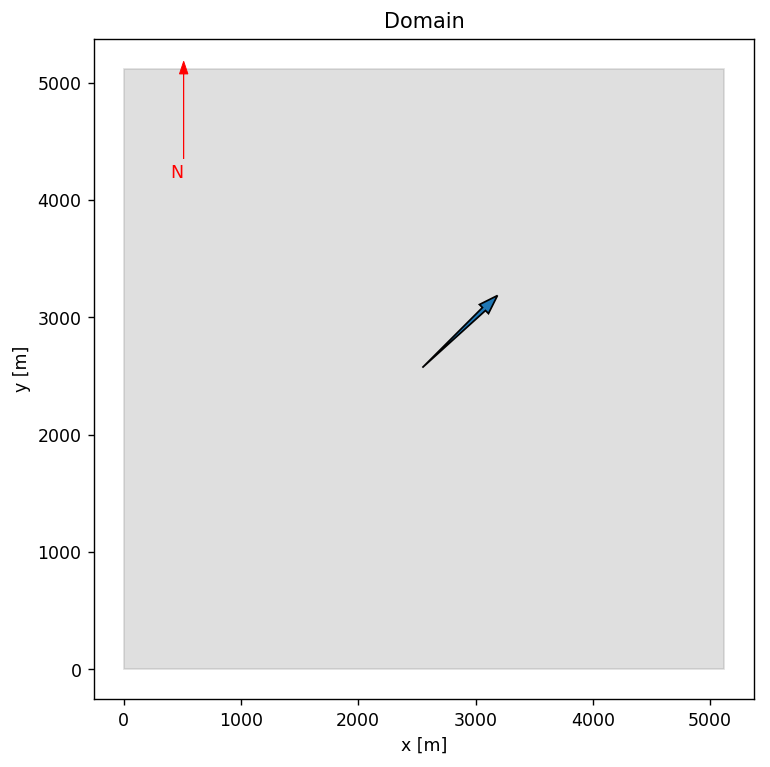

In [14]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY' 
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] 
case.plotDomain(ax=ax)

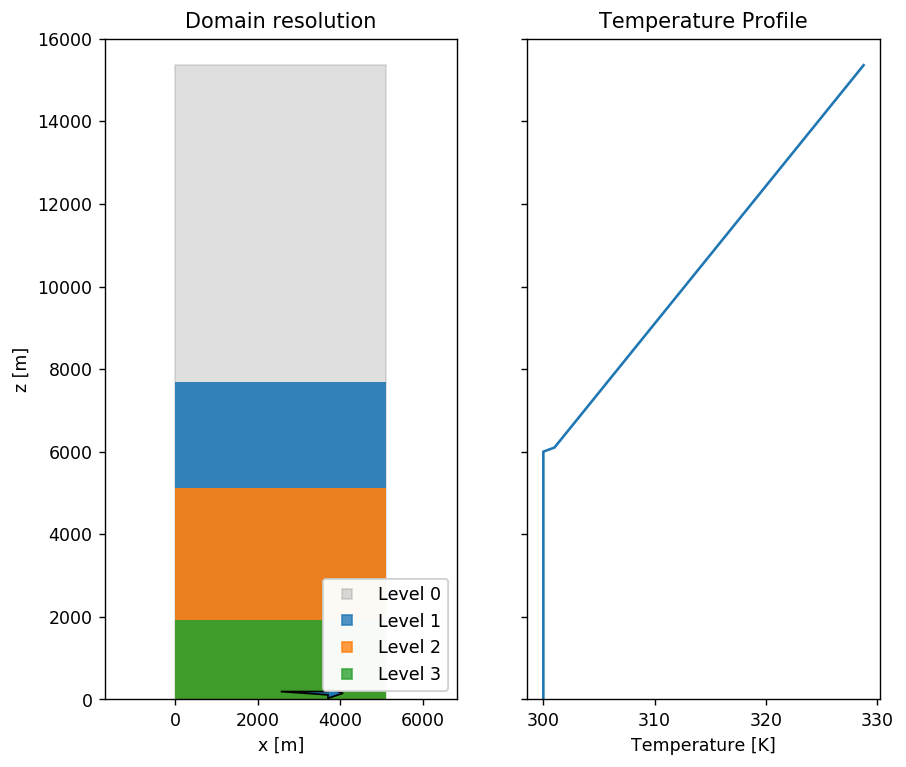

In [15]:
fig, axs = plt.subplots(1,2, figsize=(8,7), facecolor='w', dpi=125, sharey=True)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XZ' 
case.popup_storteddata['plotdomain']['plot_refineboxes']     = ['box1', 'box2', 'box3'] 
case.plotDomain(ax=axs[0])
axs[0].set_title('Domain resolution')

case.plotGenericProfile('ABL.temperature_values', 'ABL.temperature_heights', ax=axs[1])
axs[1].set_ylim([0,16000])
axs[1].set_xlabel('Temperature [K]')
axs[1].set_title('Temperature Profile')

In [16]:
check=case.validate()

-- Checking inputs --
[ PASS] max_level:           max_level = 3 >= 0
[ PASS] dt & CFL:            DT and CFL OK
[ PASS] Actuator physics:    incflo.physics and ICNS.source_terms OK for Actuators
[ SKIP] Actuator FST:        No Actuators
[ PASS] Sampling probes:p_hub 

Results: 
 4 PASS
 1 SKIP
 0 FAIL
 0 WARN


In [17]:
# Estimate mesh size
case.estimateMeshSize()

Refinement box1: level 1: 3145728 cells
Refinement box2: level 2: 16777216 cells
Refinement box3: level 3: 50331648 cells
ESTIMATED MESH SIZE
   Level       Ncells                      Cell Size
       0       786432             80.0 x 80.0 x 80.0
       1      3145728             40.0 x 40.0 x 40.0
       2     16777216             20.0 x 20.0 x 20.0
       3     50331648             10.0 x 10.0 x 10.0
  TOTAL:     71041024


In [18]:
# Write the input file
print(case.writeAMRWindInput('Neutral_9mps_precursor1_tallrefined.inp'))

# --- Simulation time control parameters ---
time.stop_time                           = 20000.0             # Max (simulated) time to evolve [s]
time.max_step                            = 80000               
time.fixed_dt                            = 0.25                # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 2000                
incflo.physics                           = ABL                 # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno                
turbulence.model                         = OneEqKsgsM84        
TKE.source_terms                         = KsgsM84Src          
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol             